In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score
import pandas as pd


STEP 1 - Importing and loading the dataset 

In [2]:
df = pd.read_csv('Housing.csv')
df = df.dropna()

In [3]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [4]:
df.dtypes

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

Preprocessing the dataset 

In [5]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [6]:
for col in ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']:
    df[col] = df[col].map({'yes': 1, 'no': 0})  

In [7]:
df.head(2)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished


converting furnishingstatus to numerical values 

In [8]:
furnishing_status_mapping = {'unfurnished': 0, 'furnished': 1, 'semi-furnished': 2}
df['furnishingstatus'] = df['furnishingstatus'].map(furnishing_status_mapping)

In [9]:
print('data after preprocessing:')
df.head()

data after preprocessing:


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,2
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1


STEP 2 -  Splitting the dataset into training and testing sets

In [10]:
X = df.drop(['price'], axis=1)
Y= df['price']

#Split (80% train, 20% test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

STEP 3 and 4 - Evaluating model using mean squared error, mean absolute error, and R-squared

In [11]:
model = LinearRegression()
model.fit(X_train, Y_train)
y_pred = model.predict(X_test)

In [12]:
MAE = mean_absolute_error(Y_test, y_pred)
MSE = mean_squared_error(Y_test, y_pred)
r2 = r2_score(Y_test, y_pred)

print(f'Mean Absolute Error: {MAE}')
print(f'Mean Squared Error: {MSE}')
print(f'R-squared: {r2}')

Mean Absolute Error: 956660.3800381479
Mean Squared Error: 1747758260816.2124
R-squared: 0.654222183958184


STEP 5 - PLotting the actual prices and predicted prices

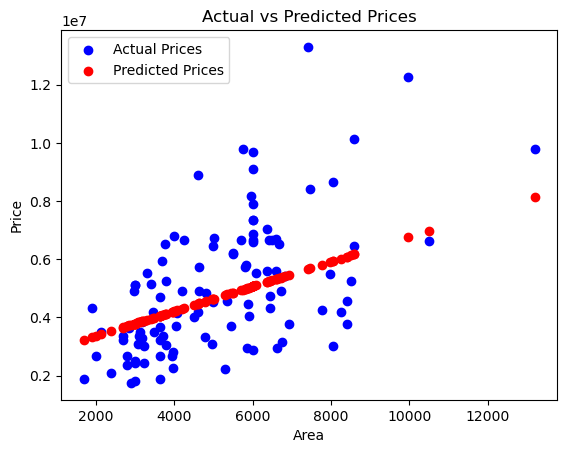

In [13]:
X_simple = df[['area']]
Y_simple = df['price']
X_train_simple, X_test_simple, Y_train_simple, Y_test_simple = train_test_split(X_simple, Y_simple, test_size=0.2, random_state=42)
model_simple = LinearRegression()
model_simple.fit(X_train_simple, Y_train_simple)
y_pred_simple = model_simple.predict(X_test_simple)
plt.scatter(X_test_simple, Y_test_simple, color='blue', label='Actual Prices')
plt.scatter(X_test_simple, y_pred_simple, color='red', label='Predicted Prices')
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Actual vs Predicted Prices')
plt.legend()
plt.show()
